## Ridge and Lasso

In [12]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [3]:
# specifiying column names
columns = ['CRIM','ZN', 'INDUS','CHAS', 'NOX', 'RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

# reading the dataset
boston_data = pd.read_csv("housing.csv.xls" , delimiter=r"\s+", header=None, names=columns)

# printing dataset
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
# seperating dependent and independent variables
X = boston_data.drop('MEDV' , axis=1)
y =boston_data['MEDV']

## Calculating Lambda parameter 

#### 1. Cross validation

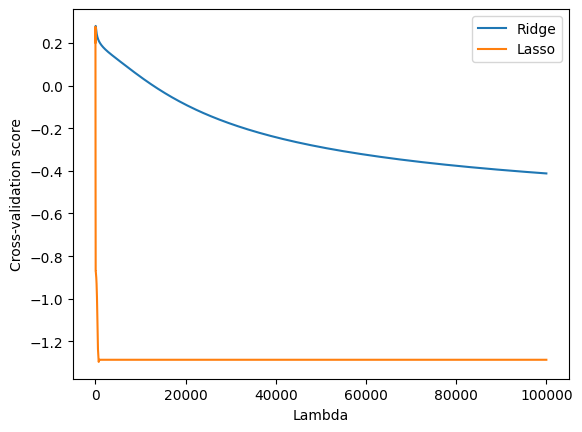

In [10]:
# setting up different lambda values
lambdas = np.logspace(-5,5,1000)

# create emptty list to store the cross validation score
ridge_score = []
lasso_score = []

# perfome ridge and lasso regression on each lambda
for lambda_val in lambdas:
    ridge = Ridge(alpha=lambda_val)
    lasso = Lasso(alpha=lambda_val)

    # storing scores
    ridge_score.append(np.mean(cross_val_score(ridge , X, y, cv=10)))
    lasso_score.append(np.mean( cross_val_score (lasso , X, y, cv=10)))

# Plot the cross-validation scores for Ridge and Lasso regression

plt.plot(lambdas, ridge_score, label='Ridge')
plt.plot(lambdas, lasso_score, label='Lasso')
plt.xlabel('Lambda')
plt.ylabel('Cross-validation score')
plt.legend()
plt.show()

In [11]:
# Find the optimal lambda value for Ridge and Lasso regression
optimal_ridge_lambda = lambdas[np.argmax(ridge_score)]
optimal_lasso_lambda = lambdas[np.argmax(lasso_score)]

print('Optimal lambda value for Ridge regression:', optimal_ridge_lambda)
print('Optimal lambda value for Lasso regression:', optimal_lasso_lambda)

Optimal lambda value for Ridge regression: 44.324785912404
Optimal lambda value for Lasso regression: 0.31952475057592133


#### 2. Grid Seaarch

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

# creating range of lambda values
lambdas = np.logspace(-5,5,1000)

# perform Grid Search on Lasso Regression
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid={'alpha' : lambdas},cv=10)
grid_search_lasso.fit(X_train, y_train)

# Evaluating performance on lasso
y_predict_lasso = grid_search_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test , y_predict_lasso)

print("Best lambda value for Lasso regression: ", grid_search_lasso.best_params_)
print("Mean squared error for Lasso regression: ", mse_lasso)

# perform Grid Search no Ridge Regression
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge , param_grid={'alpha' : lambdas} , cv=10)
grid_search_ridge.fit(X_train , y_train)

# Evaluating performance on Ridge
y_predict_ridge = grid_search_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_predict_ridge)

print("Best lambda value for Ridge regression: ", grid_search_ridge.best_params_)
print("Mean squared error for Ridge regression: ", mse_ridge)

Best lambda value for Lasso regression:  {'alpha': 1e-05}
Mean squared error for Lasso regression:  24.291092319775505
Best lambda value for Ridge regression:  {'alpha': 1e-05}
Mean squared error for Ridge regression:  24.291120053918714
